Imports:

In [1]:
%matplotlib notebook
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import lognorm

In [2]:
price = 200
sigma = 0.5
calc_lim = 6
step_size = 0.001
x = np.arange(np.max([price-price*calc_lim*sigma,0]),price+price*calc_lim*sigma,step_size)

<IPython.core.display.Javascript object>


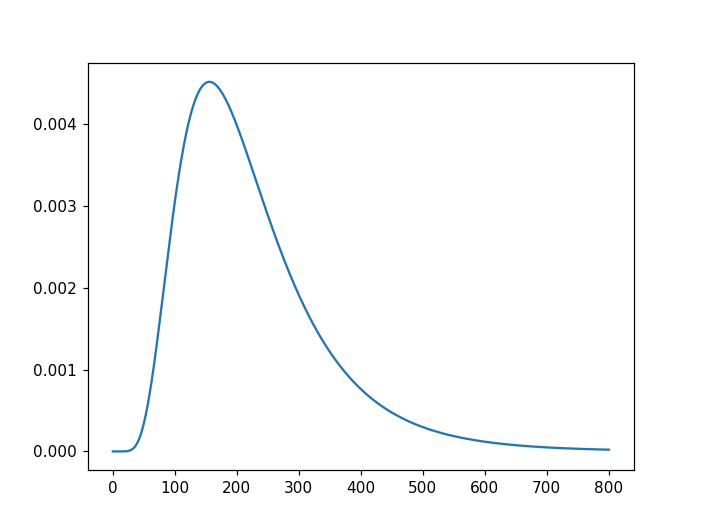

In [3]:
mu = np.log(price)
y = lognorm.pdf(x, s=sigma, scale=price,loc=0)
plt.figure()
plt.plot(x,y)

In [4]:
return_mean = (np.exp(mu+sigma**2/2)-price)/price
print(return_mean)

0.133148453067


In [5]:
return_xy = (np.sum(x*y)*step_size - price)/price
print('For high sigma and low calc_lim values this can be significantly smaller than return_mean:')
print(return_xy)

For high sigma and low calc_lim values this can be significantly smaller than return_mean:
0.120088321512


Cholesky-decompose for generating Correlated Variables

<IPython.core.display.Javascript object>


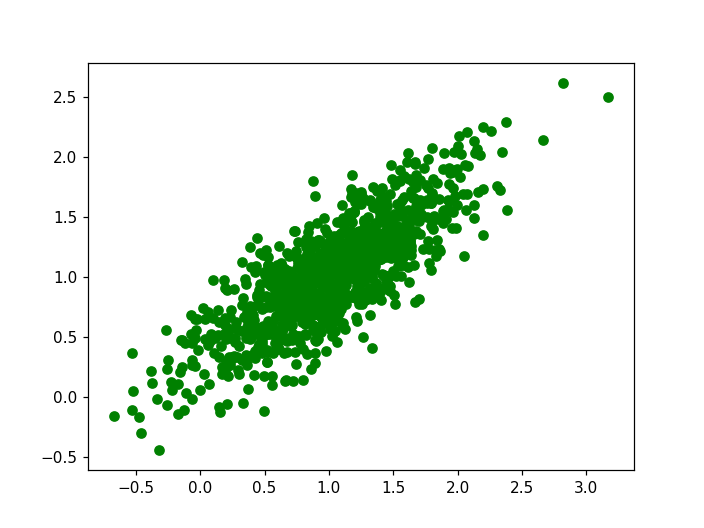

In [6]:
np.random.seed(1)

num_samples = 1000
num_variables = 2
cov = [[0.3, 0.2], [0.2, 0.2]]

L = np.linalg.cholesky(cov)
# print(L.shape)
# (2, 2)
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [1, 1]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
# print(correlated.shape)
# (2, 1000)
plt.figure()
plt.scatter(correlated[0, :], correlated[1, :], c='green')

If you want to generate two series, X and Y, with a particular (Pearson) correlation coefficient:

<IPython.core.display.Javascript object>


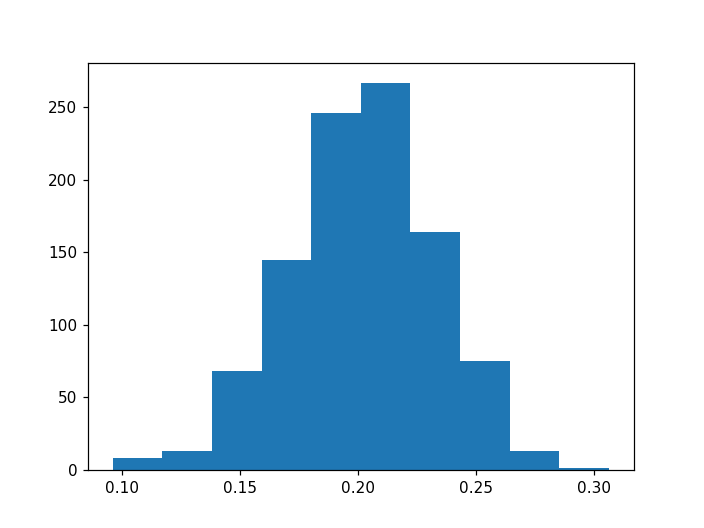

(array([   8.,   13.,   68.,  145.,  246.,  267.,  164.,   75.,   13.,    1.]),
 array([ 0.09591623,  0.11694114,  0.13796606,  0.15899097,  0.18001589,
         0.2010408 ,  0.22206572,  0.24309063,  0.26411555,  0.28514047,
         0.30616538]),
 <a list of 10 Patch objects>)

In [7]:
np.random.seed(1)

num_samples = 1000
num_variables = 2
cov = [[1.0, 0.2], [0.2, 1.0]]

L = np.linalg.cholesky(cov)

rhos = []
for i in range(1000):
    uncorrelated = np.random.standard_normal((num_variables, num_samples))
    correlated = np.dot(L, uncorrelated)
    X, Y = correlated
    rho, pval = stats.pearsonr(X, Y)
    rhos.append(rho)

plt.figure()
plt.hist(rhos)